# Using Pipelines in Grid Searches

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [3]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [4]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

print(f"Best cross-validation accuracy: {grid.best_score_:.2f}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
print(f"Best parameters: {grid.best_params_}")

Best cross-validation accuracy: 0.98
Test set score: 0.97
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


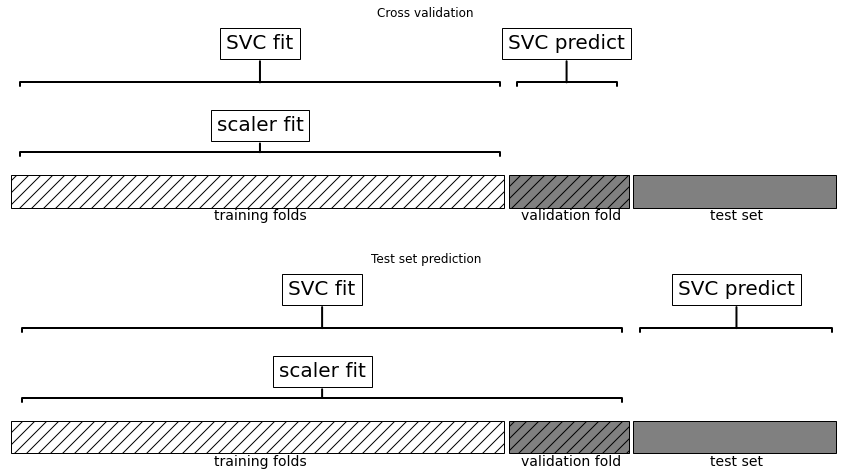

In [5]:
from helpers.plot_improper_preprocessing import plot_proper_processing

plot_proper_processing()

## Illustrating Information Leakage

In [6]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

In [7]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)

print(f"X_selected.shape: {X_selected.shape}")

X_selected.shape: (100, 500)


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

print(f"Cross-validation accuracy (cv only on ridge): {np.mean(cross_val_score(Ridge(), X_selected, y, cv=5)):.2f}")

Cross-validation accuracy (cv only on ridge): 0.91


In [9]:
pipe = Pipeline([("select", SelectPercentile(score_func=f_regression, percentile=5)), ("ridge", Ridge())])

print(f"Cross-validation accuracy (pipeline): {np.mean(cross_val_score(pipe, X, y, cv=5)):.2f}")

Cross-validation accuracy (pipeline): -0.25
